- In python, when an object is created, then all the attributes from the class are copied to the object and then \__init__ method is called. (Note: attribues definrd inside \__init__ are not fetched)  
        eg- class dog:
                breed
                tricks
                def \__init__(self,name):
                    self.name=name
                def func():
                    ...
- when a new object is created, then all attributes of the class(breed,trick,\__init__,func()) are copied in the object, then after it executes \__init__()

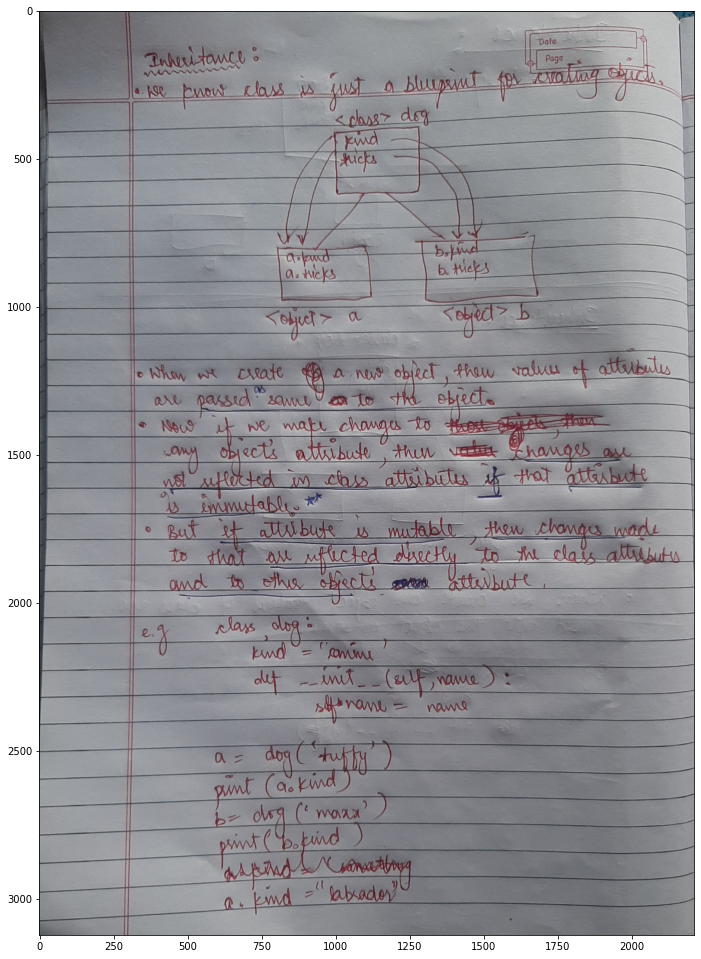

In [14]:
import matplotlib.pyplot as plt
import cv2

img1=cv2.imread("a4.3img1.jpg")
img1=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(13,17))
plt.imshow(img1)

# there is one more page after this, see next cell. They apperared so small when combined in single pic

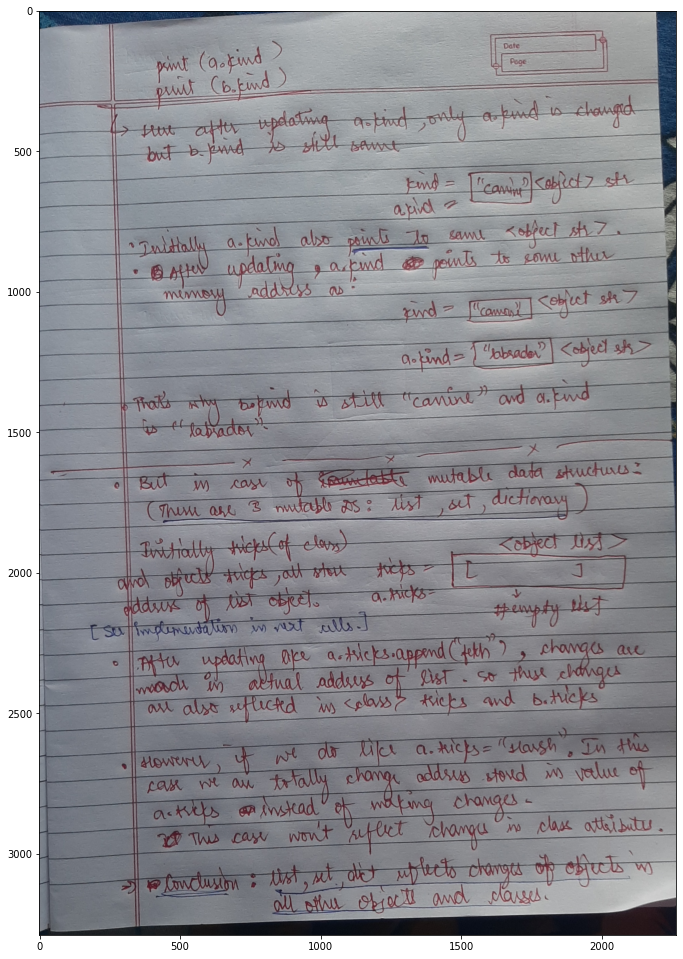

In [15]:
import matplotlib.pyplot as plt
import cv2

img2=cv2.imread("a4.3img2.jpg")
img2=cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(13,17))
plt.imshow(img2)

In [26]:
# try above for immutable objects:
class dog:
    kind="canine"
    def __init__(self):
        print(self.kind)

a=dog()   #as object is created, value of kind is printed in __init__ method
b=dog()
print("------------")

a.kind="labrador"
print(a.kind)
print(b.kind)
print(dog.kind)
# we can see from output, that even if we change value of a.kind, there is no change in other 
# objects like b.kind and neither any change in class attribute(here dog.kind)

canine
canine
------------
labrador
canine
canine


In [29]:
# try above for mutable objects(let's try for list):
class dog:
    tricks=[]
    def __init__(self):
        print(self.tricks)

a=dog()   #as object is created, value of kind is printed in __init__ method
b=dog()
print("------------")

a.tricks.append("fetch ball")
a.tricks.append("catch ball")
print(a.tricks)
print(b.tricks)
print(dog.tricks)
# we can see from output, that if we make changes in any of the object's or in class attribute, 
# then the change is also reflected in all other objects of that class and class itself.

[]
[]
------------
['fetch ball', 'catch ball']
['fetch ball', 'catch ball']
['fetch ball', 'catch ball']


In [31]:
# try above for mutable objects(let's try for list):
class dog:
    tricks=[]
    def __init__(self):
        print(self.tricks)

a=dog()   #as object is created, value of kind is printed in __init__ method
b=dog()
print("------------")

a.tricks = ["fetch", "catch"]
print(a.tricks)
print(b.tricks)
print(dog.tricks)
# here we totally assign new address to a.tricks unlike in previous code where we performed 
# operations on main address of lists. 

[]
[]
------------
['fetch', 'catch']
[]
[]


- The reason that immutable DS do not reflect changes is because there values can't be accessed using address. eg- we can't access str="Harsh"   str[0]='y' . 
- In python, string is immutable

##### Solution to the problem of these changes reflecting in other objects and classes is:
- We can solve this by instantiating attributes insided \__init__ method, which creates different attributes for all different Objects instead of passing class attributes to objects.

In [43]:
# list as attribute another example:
class dog:
    def __init__(self):
        self.tricks=[]
        print(self.tricks)

a=dog()   #as object is created, value of kind is printed in __init__ method
b=dog()
print("------------")

a.tricks.append("fetch ball")
a.tricks.append("catch ball")
print(a.tricks)
print(b.tricks)

#now a.tricks and b.tricks are totally different

[]
[]
------------
['fetch ball', 'catch ball']
[]


- id() function returns the identity of object
- All of these can also be illustrated using id() function as in 1st example print(id(a.kind))) and print(id(b.kind))) are different.  
 In 2nd example print(id(a.tricks))) and print(id(a.tricks))) are same which shows how that was reflecting changes in all other objects.

In [45]:
# we can crete some extra variables for objects also:
class dog:
    breed="bulldog"

a = dog()
b = dog()
print(a.breed)
print(b.breed)
    
a.name = "maxx"  #creating new attribute for <object> a
print(a.name)
# print(b.name)  will give error as b has no attribute as name

bulldog
bulldog
maxx


## --------------------------------------------------------------------------
### Overriding:
- There are generally 2concepts: overloading and overriding in class functions.
- Like other languages, python does not support overloading concept. But there are several ways through which we can achieve overloading in python. One such method is using duders for operator overloading.
- However python supports overriding.
##### In any object-oriented programming language, **Overriding is a feature that allows a child class to provide a specific implementation of a method that is already provided by one of its parent classes**.
- means a function which is defined in the base class can be redefined in the child class with same name. This is called overriding a function.
- Objects of child class will only know the overriden function and not the actual function of base class.

## Inheritance :
- Syntax:   class derivedclass_name(baseclass_name): ...

In [55]:
# example of method overrinding in inheritance
class SchoolMember:
    def __init__(self,name,age):
        self.name = name
        self.age = age
        print("Init School Member: {} of age: {} ".format(self.name,self.age))

#Here __init__ method of Schoolmember is completely overriden by __init__ method of teacher.
#Now objects of child class will not recognize actual __init__ method. They all will only 
#recognize overriden __init__ method of child class.
class Teacher(SchoolMember):
    def __init__(self,name,age,salary):
        SchoolMember.__init__(self,name,age)  # name and age are passed to base __init__ method.
        self.salary = salary  #salary is initiated inside derived class __init__ method. 
        print("Init Teacher : %s"%self.name)

class Student(SchoolMember):
    #this below line is not an official way of defining comments. But in python, if we do not assign string to some variable, then it is considered as comment.
    '''Represents a school student'''
    def __init__(self,name,age,marks):
        SchoolMember.__init__(self,name,age)   # name and age are passed to base __init__ method.
        self.marks = marks
        print("Init Student %s"%(self.name))

t = Teacher("Mr.Alpha",30,45000)

s = Student("Xyz",20,90)

Init School Member: Mr.Alpha of age: 30 
Init Teacher : Mr.Alpha
Init School Member: Xyz of age: 20 
Init Student Xyz


- In above program we have a base class with 2attributes: 'name' and 'age'. Then we create a inherited class 'Teacher' with one more attribute: 'salary' and we created another derived class 'student' with one more attribute: 'marks'.
- Here above we have implemented a program to store 'name' and 'age' of all objects in base class and 'salary' or 'marks' in derived class.
- To do so we called \__init__ method of base class inside \__init__ method of derived classes and we pass the 'name' and 'age' parameters. Doing this we can create any 'Teacher' object or any 'Student' object and there 'name' and 'age' will be initiated in common base class. Derived classes will only initiate 'salary' or 'marks'.
- Here above, we are also overriding \__init__ method of base class in \__init__ method of derived class.
- Now if we call obj.\__init__  , it will always execute overriden function of derived class, where obj is object of derived class.(Using \__init__ makes it a little complex as \__init__ is a special function. But you can consider any function which is redefined in derived class is overriden function.)

In [60]:
# another way of calling functions from base class is:
# example of method overrinding in inheritance
class SchoolMember:
    def __init__(self,name,age):
        self.name = name
        self.age = age
        print("Init School Member: %s "%self.name)    

#Here __init__ method of Schoolmember is completely overriden by __init__ method of teacher.
#Now objects of child class will not recognize actual __init__ method. They all will only 
#recognize overriden __init__ method of child class.
class Teacher(SchoolMember):
    def __init__(self,name,age,salary):
        super().__init__(name,age)   #super() method calls method of base class.
        self.salary = salary
        print("Init Teacher : %s"%self.name)

class Student(SchoolMember):
    '''Represents a school student'''
    def __init__(self,name,age,marks):
        super().__init__(name,age)
        self.marks = marks
        print("Init Student %s"%(self.name))

t = Teacher("Mr.Alpha",30,45000)
s = Student("Xyz",20,90)

Init School Member: Mr.Alpha 
Init Teacher : Mr.Alpha
Init School Member: Xyz 
Init Student Xyz


## \__mro__ : Method Resolution Operator
- When we have heirarchical inheritance, means a class inherited from 2 classes and those classes are inherited from a single class, then it forms a diamond like structure .
- In this case, if any two of parent or grandparent classes have same attribute, then compiler gets confused about which one to chose from them. 
- Python uses **C3 linearization** technique to resove this thing.
- There is a dunder named \__mro__ which returns us the order in which it executes

In [66]:
class A:
    x=10
class B(A):
    pass
class C(A):
    pass
class D(C):
    x=5
class E(B,D):
    pass

E.__mro__

(__main__.E, __main__.B, __main__.D, __main__.C, __main__.A, object)

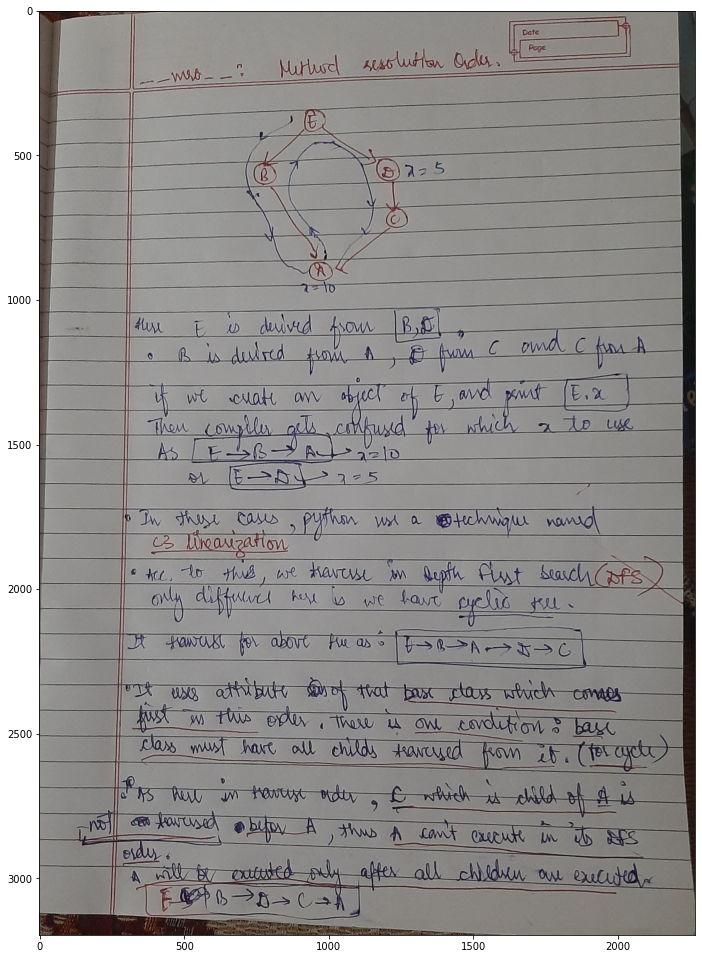

In [69]:
import matplotlib.pyplot as plt
import cv2

img3=cv2.imread("a4.3img3.jpg")
img3=cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(13,17))
plt.imshow(img3)

### Access specifiers:
- Python has no privacy model, there are no access modifiers like in C++, C# or Java. There are no truly 'protected' or 'private' attributes.
- However, python provides us a sytax which is similar to private and protected but not the same.
1. **Public** : By default any member in a class is a public member.  
2. **Protected** : any member name with 1 leading space is a protected member.(eg - self.\_var)
    - Note: We can access protected members of class outside of class even we can modify its value. like class_name.\_var="new val"
    - protected members are accessible to derived cclasses.
    - Only difference in protected and public is that protected members are not accessible to other classes.  
3. ""Private** : any member name with 2leading spaces is a private member(but name should not have more than 1 trailing space at end).
    - Private members are not accessible outside a class. Not to objects of a class and neither to derived classes. They can be accessed within the class only.
    - **But python provides a concept of name mangling**: According to this concept, **we can access private variables outside a class by using \_classname\__varname where \__varname is private member.**

| Access Specifiers | Same Class | Same Package | Derived Class | Other Class |
| --- | --- | --- | --- | --- |
| **Public** | Yes | Yes | Yes | Yes |
| **Protected** | Yes | Yes | Yes | No |
| **Private** | Yes | No | No | No |

In [71]:
#Syntax_protected_access_modifiers
class Student:
    def __init__(self):
        self._name = "PythonLobby.com"   # protected member 

    def _funName(self):     # protected member
        return "Method Here"

class Subject(Student):
    pass

obj = Student()   #object of parent class
obj1 = Subject()  #object of child class

# calling by obj. ref. of Student class
print(obj._name)      # PythonLobby.com
print(obj._funName())     # Method Here

# calling by obj. ref. of Subject class
print(obj1._name)     # PythonLobby.com
print(obj1._funName())    # Method Here

#from above we can see , child class is also able to access protected member of parent class

PythonLobby.com
Method Here
PythonLobby.com
Method Here


In [76]:
# Private_access_modifiers 
class Student: 
    def __init__(self, age, name): 
        self.__age = age
        
        def __funName(self):
            self.y = 34
            print(self.y)

obj = Student(21,"pythonlobby")

# calling by object reference of class Student
print(obj.__age)   # it shows error as private members are not accessible from outside of class
print(obj.__funName())

AttributeError: 'Student' object has no attribute '__age'

In [83]:
# Private_access_modifiers 
class Student: 
    def __init__(self, age, name): 
        self.__age = age
        
        def __funName(self):
            self.y = 34
            print(self.y)

obj = Student(21,"pythonlobby")

# calling by object reference of class Student
print(obj._Student__age)   #using name mangling resolved error in ver_names

print(obj._Student__funName())  # but it still gives us error

21


AttributeError: 'Student' object has no attribute '_Student__funName'